Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
# steps to follow
#importing the data set then do conversion of dtype. conversion on binomial and categorical data
#EDA operation
# check the variables for predictive power.
# making final logistic model
# using random sampler

In [2]:
!pip install imblearn

In [139]:
import pandas as pd
import numpy as np
import imblearn
import seaborn as sns
import pandas_profiling as pp
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from collections import Counter

In [4]:
d = pd.read_csv('bank-full.csv' , quotechar='"',sep=';')
d
d.info() # no null values
d.describe()
#numerical object datatypes need to converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [5]:
#Converting yes/no values to 1 and 0 respectively:


# housing
d['housing']=np.where(d['housing'] =='no', 0, d['housing'])
d['housing']=np.where(d['housing'] =='yes', 1, d['housing'])
d['housing'] = d['housing'].astype("int64")

# default
d['default']=np.where(d['default'] =='no', 0, d['default'])
d['default']=np.where(d['default'] =='yes', 1, d['default'])
d['default'] = d['default'].astype("int64")

# loan
d['loan']=np.where(d['loan'] =='no', 0, d['loan'])
d['loan']=np.where(d['loan'] =='yes', 1, d['loan'])
d['loan'] = d['loan'].astype("int64")

# y
d['y']=np.where(d['y'] =='no', 0, d['y'])
d['y']=np.where(d['y'] =='yes', 1, d['y'])
d['y'] = d['y'].astype("int64")

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [6]:
# profiling report
profile = pp.ProfileReport(d)
profile
#no duplicate cells
#mostly false for Y.

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

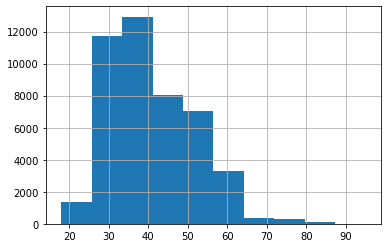

In [7]:
#looking at age
d.age.describe()
d.age.hist() 

5289


(array([ 320., 1462., 1295.,  726.,  648.,  497.,  148.,  138.,   48.,
           7.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

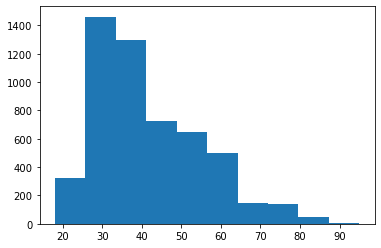

In [8]:
filt_age = d.y == 1
d.loc[filt_age]['age'].value_counts().head(10)
print(d.loc[filt_age]['age'].count()) #5k people.
plt.hist(d.loc[filt_age]['age'])
# they acutally took term deposits.
# age data is dispersed a lot. age should be splitted.

In [9]:
d.age = d.assign(age=pd.cut(d['age'],bins=[18, 25, 45, 60, 100],labels=['age18_25', 'age25_45', 'age45_60', 'age60_100']))['age']

<AxesSubplot:xlabel='age'>

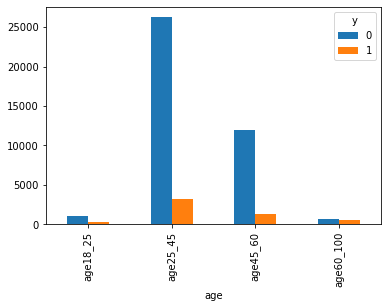

In [10]:
#Visulalization
pd.crosstab(d.age,d.y).plot(kind='bar')

In [11]:
# age 30 to 40 have the most of the bank term depositors.

In [12]:
#job criteria
print(d.job.unique()) 
print(d.job.value_counts())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [13]:
#counting different job catergories with their term deposits.
job = d.groupby('job')
job['y'].value_counts()

job            y
admin.         0    4540
               1     631
blue-collar    0    9024
               1     708
entrepreneur   0    1364
               1     123
housemaid      0    1131
               1     109
management     0    8157
               1    1301
retired        0    1748
               1     516
self-employed  0    1392
               1     187
services       0    3785
               1     369
student        0     669
               1     269
technician     0    6757
               1     840
unemployed     0    1101
               1     202
unknown        0     254
               1      34
Name: y, dtype: int64

<AxesSubplot:xlabel='job'>

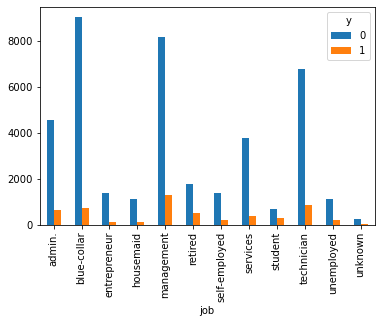

In [14]:
#Visulalization
pd.crosstab(d.job,d.y).plot(kind='bar')

In [15]:
# looking at the graph, mangement job will most likely opt for term deposits.
# hpusemaids are least.

In [16]:
#marital status could be or couldnt be a good predictor.
print(d.marital.unique()) 
print(d.marital.value_counts())
# divorced people less likely to go for term deposits.

['married' 'single' 'divorced']
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [17]:
marital = d.groupby('marital')
marital['y'].value_counts()

marital   y
divorced  0     4585
          1      622
married   0    24459
          1     2755
single    0    10878
          1     1912
Name: y, dtype: int64

<AxesSubplot:xlabel='marital'>

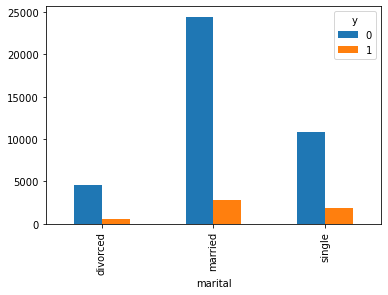

In [18]:
pd.crosstab(d.marital,d.y).plot(kind = 'bar')
# married people, singles even divorced will opt for term depoists.

In [19]:
# lets see education criteria

In [20]:
print(d.education.unique()) 
print(d.education.value_counts())

['tertiary' 'secondary' 'unknown' 'primary']
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [21]:
ed = d.groupby('education')
ed['y'].value_counts()

education  y
primary    0     6260
           1      591
secondary  0    20752
           1     2450
tertiary   0    11305
           1     1996
unknown    0     1605
           1      252
Name: y, dtype: int64

<AxesSubplot:xlabel='education'>

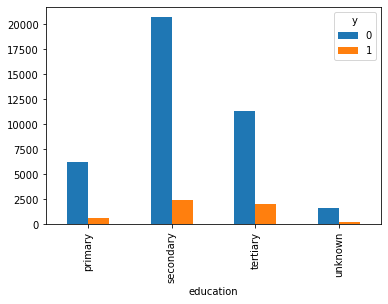

In [22]:
pd.crosstab(d.education,d.y).plot(kind = 'bar')
#people who recieved secondary and tertiary education will most likely opt for term deposits.

In [23]:
# contact
print(d.contact.unique()) 
print(d.contact.value_counts()) 

['unknown' 'cellular' 'telephone']
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [24]:
count_notcontact = len(d[d['pdays']==-1])
count_notcontact
#these poeple are not contacted

36954

In [25]:
d['contact'].value_counts() 
#a lot of the people are not contacted.

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [26]:
#No of people who availed subscription after being contacted during campaign.
c = d.pdays != -1 # == -1 means not contacted before in campaign.
d.loc[c]['y'].value_counts(normalize = True)

0    0.769287
1    0.230713
Name: y, dtype: float64

In [27]:
#default category
print(d.default.unique()) 
print(d.default.value_counts())

[0 1]
0    44396
1      815
Name: default, dtype: int64


In [28]:
default = d.groupby('default')
default['y'].value_counts()

default  y
0        0    39159
         1     5237
1        0      763
         1       52
Name: y, dtype: int64

<AxesSubplot:xlabel='default'>

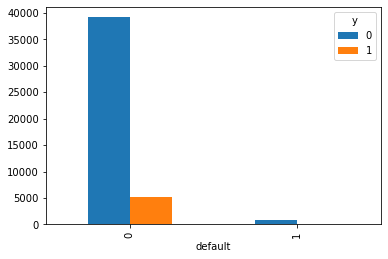

In [29]:
pd.crosstab(d.default,d.y).plot(kind = 'bar')
#default looks like a good predictor.
#almost 5k people without default credit opted for term deposits

In [30]:
#housing category
print(d.housing.unique()) 
print(d.housing.value_counts())

[1 0]
1    25130
0    20081
Name: housing, dtype: int64


In [31]:
housing = d.groupby('housing')
housing['y'].value_counts()

housing  y
0        0    16727
         1     3354
1        0    23195
         1     1935
Name: y, dtype: int64

<AxesSubplot:xlabel='housing'>

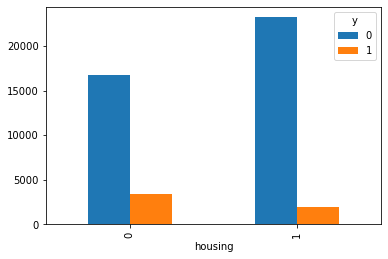

In [32]:
pd.crosstab(d.housing,d.y).plot(kind = 'bar')

In [33]:
# people dont opted for housing loans will opt term deposits.

In [34]:
#loan category
print(d.loan.unique()) 
print(d.loan.value_counts())

[0 1]
0    37967
1     7244
Name: loan, dtype: int64


In [35]:
loan = d.groupby('loan')
loan['y'].value_counts()

loan  y
0     0    33162
      1     4805
1     0     6760
      1      484
Name: y, dtype: int64

<AxesSubplot:xlabel='loan'>

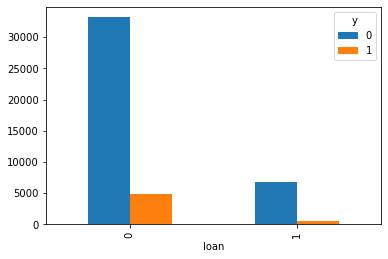

In [36]:
pd.crosstab(d.loan,d.y).plot(kind = 'bar')

In [37]:
#  people not opted for loans will most likely opt for term deposits.

In [38]:
#month category 

In [39]:
month = d.groupby('month')
month['y'].value_counts()

month  y
apr    0     2355
       1      577
aug    0     5559
       1      688
dec    0      114
       1      100
feb    0     2208
       1      441
jan    0     1261
       1      142
jul    0     6268
       1      627
jun    0     4795
       1      546
mar    1      248
       0      229
may    0    12841
       1      925
nov    0     3567
       1      403
oct    0      415
       1      323
sep    0      310
       1      269
Name: y, dtype: int64

<AxesSubplot:xlabel='month'>

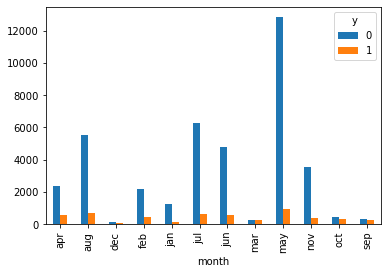

In [40]:
pd.crosstab(d.month,d.y).plot(kind='bar')

In [41]:
# campaign category 

In [42]:
campaign = d.groupby('campaign')
campaign['y'].value_counts()

campaign  y
1         0    14983
          1     2561
2         0    11104
          1     1401
3         0     4903
               ...  
50        0        2
51        0        1
55        0        1
58        0        1
63        0        1
Name: y, Length: 70, dtype: int64

<AxesSubplot:xlabel='campaign'>

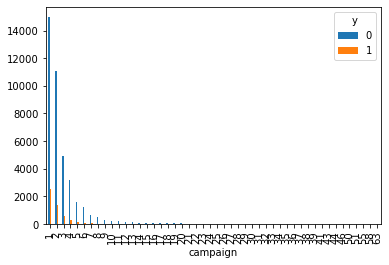

In [43]:
pd.crosstab(d.campaign,d.y).plot(kind = 'bar')

In [44]:
# more calls results in less subscriptions
# most subscribers are from 1 to 5 calls.
# not a good factor.

In [45]:
# poutcome category 
print(d.poutcome.unique()) 
print(d.poutcome.value_counts())

['unknown' 'failure' 'other' 'success']
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


<AxesSubplot:xlabel='poutcome'>

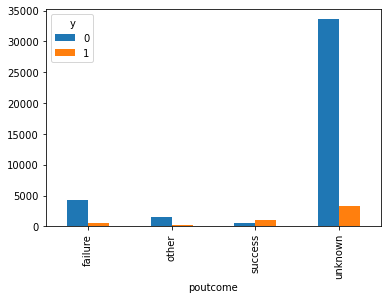

In [46]:
pd.crosstab(d.poutcome,d.y).plot(kind='bar')

In [47]:
# few people have subscirbed for term deposits. as contacted.

In [48]:
# from the above operations we will only use 
#age job marital education default housing loan contact month poutcome for the model
# we will not use day duration  pdays  previous campaign balance

In [49]:
# dropping unused data
data = d.copy()
data = data.drop(['day','duration','balance','campaign','pdays','previous'], axis =1)
data

age           job   marital  education  default  housing  loan  \
0       age45_60    management   married   tertiary        0        1     0   
1       age25_45    technician    single  secondary        0        1     0   
2       age25_45  entrepreneur   married  secondary        0        1     1   
3       age45_60   blue-collar   married    unknown        0        1     0   
4       age25_45       unknown    single    unknown        0        0     0   
...          ...           ...       ...        ...      ...      ...   ...   
45206   age45_60    technician   married   tertiary        0        0     0   
45207  age60_100       retired  divorced    primary        0        0     0   
45208  age60_100       retired   married  secondary        0        0     0   
45209   age45_60   blue-collar   married  secondary        0        0     0   
45210   age25_45  entrepreneur   married  secondary        0        0     0   

         contact month poutcome  y  
0        unknown   may  unknown  0  
1        unknown   may  unknown  0  
2        unknown   may  unknown  0  
3        unknown   may  unknown  0  
4        unknown   may  unknown  0  
...          ...   ...      ... ..  
45206   cellular   nov  unknown  1  
45207   cellular   nov  unknown  1  
45208   cellular   nov  success  1  
45209  telephone   nov  unknown  0  
45210   cellular   nov    other  0  

[45211 rows x 11 columns]

In [50]:
# some items require dummy variables.

In [51]:
dummy = ['age','job','marital','education','contact','month','poutcome']
data1 =  pd.get_dummies(data,columns=['age','job','marital','education','contact','month','poutcome'])
data1 = data1[['y','default','housing','loan','age_age18_25','age_age25_45','age_age45_60','age_age60_100',
 'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
 'job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married',
 'marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular',
 'contact_telephone','contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
 'poutcome_success', 'poutcome_unknown']] #Rearranging the columns 
data1.head()

y  default  housing  loan  age_age18_25  age_age25_45  age_age45_60  \
0  0        0        1     0             0             0             1   
1  0        0        1     0             0             1             0   
2  0        0        1     1             0             1             0   
3  0        0        1     0             0             0             1   
4  0        0        0     0             0             1             0   

   age_age60_100  job_admin.  job_blue-collar  ...  month_jun  month_mar  \
0              0           0                0  ...          0          0   
1              0           0                0  ...          0          0   
2              0           0                0  ...          0          0   
3              0           0                1  ...          0          0   
4              0           0                0  ...          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0          1          0          0          0                 0   
1          1          0          0          0                 0   
2          1          0          0          0                 0   
3          1          0          0          0                 0   
4          1          0          0          0                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 46 columns]

In [59]:
x = data1[['default','housing','loan','age_age18_25','age_age25_45','age_age45_60','age_age60_100',
 'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
 'job_services','job_student','job_technician','job_unemployed','job_unknown','marital_divorced','marital_married',
 'marital_single','education_primary','education_secondary','education_tertiary','education_unknown','contact_cellular',
 'contact_telephone','contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
 'poutcome_success', 'poutcome_unknown']]
y = data['y']

In [108]:
# bias in the model should be resolved
data1.y.value_counts(normalize = True)

0    0.883015
1    0.116985
Name: y, dtype: float64

In [109]:
# random over sampling and under sampling for unbalanced classification
oversample = RandomOverSampler(sampling_strategy=0.3)
undersample = RandomUnderSampler(sampling_strategy=0.6)
pipeline = Pipeline(steps=[('o', over), ('u', under)])
xres, yres = pipeline.fit_resample(x, y)

In [110]:
classifier = LogisticRegression()
classifier.fit(xres,yres)

C:\Users\amanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
#Predict for x
ypred = classifier.predict(xres)
print(ypred)
print(yres)

[0 0 0 ... 1 1 0]
0        0
1        0
2        0
3        0
4        0
        ..
31931    1
31932    1
31933    1
31934    1
31935    1
Name: y, Length: 31936, dtype: int64


pandas.core.series.Series

In [138]:
ypred_df= pd.DataFrame({'actual': yres,'predicted_prob': classifier.predict(xres)})
ypred_df


<class 'numpy.ndarray'>


pandas.core.series.Series

In [137]:
# clasification report
print(classification_report(yres,ypred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82     19960
           1       0.78      0.47      0.58     11976

    accuracy                           0.75     31936
   macro avg       0.76      0.69      0.70     31936
weighted avg       0.76      0.75      0.73     31936



In [140]:
classifier.predict_proba(xres)

array([[0.85572294, 0.14427706],
       [0.75172102, 0.24827898],
       [0.68008121, 0.31991879],
       ...,
       [0.49856294, 0.50143706],
       [0.42393625, 0.57606375],
       [0.67686   , 0.32314   ]])

AUC vale = 0.6940046760187041


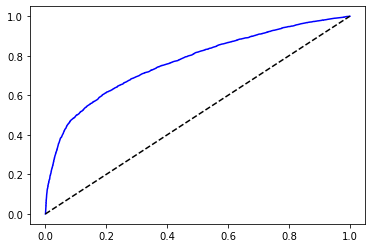

In [141]:
fpr,tpr,_ = roc_curve(yres, classifier.predict_proba (xres)[:,1])

auc = roc_auc_score(yres, ypred)

plt.plot(fpr, tpr, color='blue', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')

print("AUC vale = "+str(auc))


In [ ]:
#70% accuracy average ROC curve